# Analysis of statistics of multiple runs
'GPS tracker.ipynb' demonstrates how we can evaluate an individual run and extract relevant metrics and visualize the run. In this notebook, we can now compare different runs using the metrics extracted from each run.

First, we import a file containing the statistics for all runs (run-stats.csv). This file was produced by 'GPS multiple file anaylsis.ipynb'.

The data set contains the file name, start time, total distance, total time, elevation climb and average pace of each run.

In [2]:
import pandas as pd

# Load run-stats.csv
data = pd.read_csv('run-stats.csv')

In [6]:
data.head(3)

,Unnamed: 0,avg_pace,climb,dist,file,start,total_time
0,0,9.198780,694.881912,9.151576,2013-04-13-172927.gpx,2013-04-13 15:29:27,01:24:11
1,1,9.218519,396.325472,7.839292,2013-04-18-180727.gpx,2013-04-18 16:07:27,01:12:16
2,2,8.349534,419.291352,5.575161,2013-04-24-173355.gpx,2013-04-24 15:33:55,00:46:33


## Fastest runs
Using pandas' masking and sorting functionality it is straightforward to take a look at the runs with the lowest pace (i.e. the fastest ones).

In [7]:
# Remove cycling assuming pace < min_pace or mileage over max_dist
min_pace = 6
max_dist = 26

data_running = data[(data['dist']<max_dist) & (data['avg_pace']>min_pace)]
data_running.sort_values(by=['avg_pace'], ascending=True).head(3)

,Unnamed: 0,avg_pace,climb,dist,file,start,total_time
100,100,6.830311,62.007876,1.751994,2014-06-15-135143.gpx,2014-06-15 11:51:43,00:11:58
389,389,7.430194,452.755920,13.227560,2018-03-04-070016.gpx,2018-03-04 15:00:16,01:38:17
107,107,7.799136,702.755928,6.242144,2014-07-10-191710.gpx,2014-07-10 17:17:10,00:48:41


In following plot we can quickly see that pace has been relatively stable over the last couple of years but has recently gone down a little (I'm training for the San Francisco Marathon!).

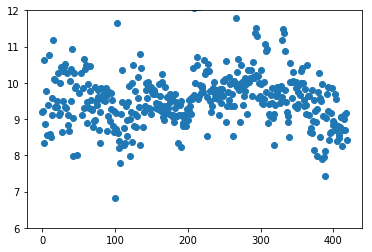

In [8]:
import matplotlib.pyplot as plt
x = data_running.index.values.tolist()
plt.scatter(x,data_running['avg_pace'])
plt.ylim(6,12)
plt.show()

## Longest runs
Next we can look at the longest runs

In [10]:
# Remove cycling assuming pace < min_pace or mileage over max_dist
min_pace = 6
max_dist = 26

data_running = data[(data['dist']<max_dist) & (data['avg_pace']>min_pace)]
data_running.sort_values(by=['dist'], ascending=False).head(3)

,Unnamed: 0,avg_pace,climb,dist,file,start,total_time
380,380,10.272756,421.587940,17.004525,2018-02-10-080317.gpx,2018-02-10 16:03:17,02:54:41
44,44,10.266963,568.897656,16.207325,2013-09-01-160310.gpx,2013-09-01 16:03:10,02:46:24
417,417,9.178240,321.194236,15.562170,2018-05-19-075700.gpx,2018-05-19 14:57:00,02:22:50


We can also look at a histogram to see what are the running distances that occur the most often. Evidently, most runs are 6-mile runs.

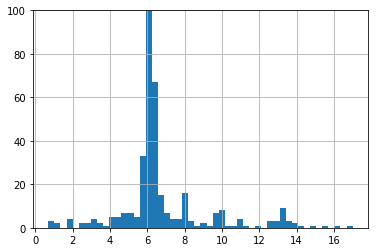

In [11]:
import matplotlib.pyplot as plt

data_running['dist'].hist(bins=50)
plt.ylim(0,100)
plt.show()

## Fastest half marathons
The list below looks specifically at half marathons (runs with distances between 13.1 and 13.9 miles) and shows the fastest ones.

In [13]:
# Fastest half marathons
hm = data_running[(data_running['dist']>13.1) & (data_running['dist']<13.9)]
hm.sort_values(by=['total_time'], ascending=True).head(3)

,Unnamed: 0,avg_pace,climb,dist,file,start,total_time
389,389,7.430194,452.755920,13.227560,2018-03-04-070016.gpx,2018-03-04 15:00:16,01:38:17
384,384,7.902291,211.942264,13.105904,2018-02-17-085727.gpx,2018-02-17 16:57:27,01:43:34
319,319,8.273259,268.044628,13.114542,2017-05-27-080902.gpx,2017-05-27 15:09:02,01:48:30
